<a href="https://colab.research.google.com/github/LarrySerratos/CienciaMatematicadeDatos/blob/main/Data_Analyst_Assignment_2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analyst Assignment

## Data Challenge

Sales leadership has tasked you with analyzing the data to discover how employee training
impacts sales performance and effectiveness. The goal is to identify patterns and provide
actionable recommendations that drive sales growth and improve team performance by
answering the following questions.
Questions
1. What is the training completion rate for each course by segments (SVP Leader/Region),
factoring in the following caveats? Training is required for all employees except:
* Employees currently on leave are exempt from the training requirement.
* 'Sell More Suite SKU' course is not required for employees within the 'Advocacy'
cost center family.
* “Suite/Automation Technical Lab” and “Advanced Suite Bots Lab Course”
courses are required only for employees in the 'PreSales' and 'Services' cost
center family.

2. How would you analyze the performance of an account executive? Is there a difference
between those who have completed training and those who have not? How would you
segment the data and present your findings to senior stakeholders?
* Hint: Look at this from an overall employee perspective who has completed any
training vs. those who have not completed any training. Any training would count,

rather than distinguishing which specific courses were completed, as they all
contribute to one Suite product.

3. Any other interesting insights that you can see in the data? Any data quality issues with
the data? Any challenges with analyzing the data? What additional data do you think
would be useful for further analyzing the existing datasets?



---

## Data Dictionary

### Table 1 : Employee Information

This table maintains critical employment details for organization members, including
identification, job titles, management hierarchies, tenure, and work region

* **Employee_ID:** Unique identifier for each employee.
* **SVP Leader:** Leader overseeing the employee.
* **Business Title:** Official job title of the employee.
* **Cost Center:** Identifier for the employee's department or unit for cost tracking.
* **Cost Center Family:** Group of related cost centers for financial reporting.
* **Length of Service:** Total time the employee has worked at the company.
* **Leave Status:** Indication of whether the employee is on leave.
* **Is People Manager?:** Indicates if the employee oversees other staff.
* **Region:** Geographic area where the employee works.
* **Manager IC Helper:** Additional data supporting managerial status.
* **IC:** Individual Contributor

### Table 2: Completed Trainings
This table records the professional development activities of employees by linking completed
training programs to their unique identifiers
* **Employee_ID:** Unique identifier linked to an employee who completed the training.
* **Training Name:** Name of the training program or course that the employee completed.

### Table 3: Performance Data
This table includes the sales and revenue generation activities of employees by cataloguing
opportunities, their progression, and financial outcomes. It captures granular data on sales
stage milestones, product-related charges, and revenue figures, all linked by employee and
opportunity identifiers, making it a vital asset for analyzing sales performance and compensation
metrics.

* **Employee_ID:** Unique identifier for the employee associated.
* **Opportunity ID:** Unique identifier for the sales opportunity.
* **Type:** The category or classification of the opportunity.
* Expansion is for existing business

* **Stage 2+ Date:** The date when the opportunity reached or surpassed stage 2 in the
sales process.
* **Stage:** Current stage of the opportunity in the sales pipeline.
 * 02 - Discovery: Initial stage where potential needs and opportunities are
identified with the client.
 * 03 - Solution Review: Potential solutions are presented and reviewed with the
client.
 * 04 - Solution Validation: Client feedback is incorporated, and solutions are
refined and validated.
 * 05 - Contracting / Verba: Terms are negotiated and a verbal agreement may be
reached.
 * 06 - Signed/07 - Closed: Formal agreement is executed with signatures from all
parties. Signed and Closed are counted as finalized
* **Close Date:** The date when the opportunity was closed.
* **Product Rate Plan Charge:** The charge associated with the product's rate plan.
* **Product Name:** The name of the product related to the opportunity.
* **Add-On ARR (converted):** The value of the additional ARR from add-ons,
* **Total Commissionable ARR (converted):** The total annual recurring revenue that is
eligible for commission

# Solution

In order to complete this task it is necessary to get the next libraries:

* **Pandas** : data extraction and exploratory data analysis.
* **Numpy** : math equations and arrays.
* **Matplotlib** : data visualization.

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data extraction

The main step is to get a great data extraction, with the correct extraction it is possible to complete the next tasks.

In [ ]:
#Read table 1

table1 = pd.read_excel('Assignment_2.xlsx',sheet_name=0)
table1

,Employee_ID,SVP Leader,Business Title,Cost Center,Cost Center Family,Length of service,Leave Status,is People Manager?,Region,Manager IC Helper
0,1,Leader 1,Senior Commercial Account Executive,532 Commercial AE,Commercial,20,Active,False,EMEA,IC
1,2,Leader 1,Senior Commercial Account Executive,532 Commercial AE,Commercial,13,Active,False,EMEA,IC
2,3,Leader 1,Senior Commercial Account Executive,552 Mid-Market AE,Mid-Market,44,Active,False,EMEA,IC
3,4,Leader 2,Enterprise Corporate Account Executive,508 LATAM Enterprise AE,Enterprise,9,Active,False,LATAM,IC
4,5,Leader 1,Senior Commercial Account Executive,532 Commercial AE,Commercial,15,Active,False,EMEA,IC
...,...,...,...,...,...,...,...,...,...,...
2527,2528,Leader 5,Contingent Worker,256 Prof Services Ops,Services,0,Active,False,EMEA,IC
2528,2529,Leader 5,Contingent Worker,256 Prof Services Ops,Services,0,Active,False,EMEA,IC
2529,2530,Leader 5,Contingent Worker,256 Prof Services Ops,Services,0,Active,False,EMEA,IC
2530,2531,Leader 5,Contingent Worker,256 Prof Services Ops,Services,0,Active,False,EMEA,IC


In [ ]:
#Read table 2

table2 = pd.read_excel('Assignment_2.xlsx',sheet_name=1)
table2

,Employee_ID,Training_Completed
0,2.0,Sell More Suite SKU
1,5.0,Sell More Suite SKU
2,9.0,Sell More Suite SKU
3,10.0,Sell More Suite SKU
4,12.0,Sell More Suite SKU
...,...,...
1977,NaN,Suite/Automation Technical Lab
1978,NaN,Suite/Automation Technical Lab
1979,2436.0,Suite/Automation Technical Lab
1980,1876.0,Suite/Automation Technical Lab


In [ ]:
#Read table 3

table3 = pd.read_excel('Assignment_2.xlsx',sheet_name=2)
table3

,Employee_ID,Opportunity ID,Type,Stage 2+ Date,Stage,Close Date,Product Rate Plan Charge,Product Name,Add-On ARR (converted) Currency,Add-On ARR (converted),Total Commissionable ARR (converted) Currency,Total Commissionable ARR (converted)
0,963.0,10000,New Business,2016-10-16,03 - Solution Review,2018-06-03,Suite Subscription,Support: Addons,USD,25771,USD,225073
1,435.0,10005,Expansion,2017-12-14,02 - Discovery,2018-03-02,Suite Subscription,Support: Addons,USD,6861,USD,4561
2,33.0,10010,Expansion,2017-12-17,02 - Discovery,2018-06-09,Suite Subscription,Support: Addons,USD,21198,USD,11215
3,1634.0,10015,Expansion,2017-12-15,02 - Discovery,2018-03-30,Suite Subscription,Support: Addons,USD,47413,USD,46811
4,1998.0,10020,New Business,2017-12-22,02 - Discovery,2018-02-13,Suite Subscription,Support: Addons,USD,3973,USD,6700
...,...,...,...,...,...,...,...,...,...,...,...,...
602,1741.0,12970,Expansion,2018-01-16,06 - Signed,2018-01-18,Suite Subscription,Suite,NaN,0,NaN,0
603,1389.0,12975,Expansion,2017-12-26,06 - Signed,2018-01-07,Suite Subscription,Suite,NaN,0,NaN,0
604,1389.0,12975,Expansion,2017-12-26,06 - Signed,2018-01-07,Suite Subscription,Suite,NaN,0,NaN,0
605,1389.0,12975,Expansion,2017-12-26,06 - Signed,2018-01-07,Suite Subscription,Suite,NaN,0,NaN,0


The next step before answer the questions is to know if the tables have missing values and how to lead with these missind data.

In [ ]:
# Missing data for table 1

print(table1.isna().sum())

Employee_ID           0
SVP Leader            0
Business Title        0
Cost Center           0
Cost Center Family    0
Length of service     0
Leave Status          0
is People Manager?    0
Region                0
Manager IC Helper     0
dtype: int64


In [ ]:
# Missing data for table 2

print(table2.isna().sum())

Employee_ID           200
Training_Completed      0
dtype: int64


In [ ]:
# Missing data for table 3

print(table3.isna().sum())

Employee_ID                                      2
Opportunity ID                                   0
Type                                             0
Stage 2+ Date                                    0
Stage                                            0
Close Date                                       0
Product Rate Plan Charge                         0
Product Name                                     0
Add-On ARR (converted) Currency                  8
Add-On ARR (converted)                           0
Total Commissionable ARR (converted) Currency    7
Total Commissionable ARR (converted)             0
dtype: int64


We can see before that there exists missing values in table 2 and 3, in the columns **Employee_ID**, it is essential to know who owns that information in order to ensure consistency between the data.


The data will be split in 2, data with missing values in **Employee_ID** column it can be useful in future questions and data without missing values.

In [ ]:
#Table 2 without missing values

table2_cl = table2.dropna(subset=[table3.columns[0]],axis=0)

In [ ]:
#Table 3 without missing values

table3_cl = table3.dropna(subset=[table3.columns[0]],axis=0)

Now a single table will be created with all the data according to the **Employee_id**, but first the index will be changed for the Employee_ID for all the dataframes without missing values.

In [ ]:
#Index as Employee ID

#Table 1
table1.set_index('Employee_ID', inplace=True)

#Table 2 clean
table2_cl['Employee_ID'] = table2_cl['Employee_ID'].astype(int)
#table2_cl.set_index('Employee_ID', inplace=True)

#Table 3 clean
table3_cl['Employee_ID'] = table3_cl['Employee_ID'].astype(int)
#table3_cl.set_index('Employee_ID', inplace=True)

<ipython-input-10-2623860cb8c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2_cl['Employee_ID'] = table2_cl['Employee_ID'].astype(int)
<ipython-input-10-2623860cb8c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table3_cl['Employee_ID'] = table3_cl['Employee_ID'].astype(int)


In [ ]:
#Merge 3 dataframes

merged_df = pd.merge(table1, table2_cl, on='Employee_ID', how='outer')
merged_df = pd.merge(merged_df, table3_cl, on='Employee_ID', how='outer')
data = pd.concat([merged_df, table1, table2_cl, table3_cl], ignore_index=True, axis=0)
data= data.drop_duplicates(subset=['Employee_ID'])
data.set_index('Employee_ID', inplace=True)
data

,SVP Leader,Business Title,Cost Center,Cost Center Family,Length of service,Leave Status,is People Manager?,Region,Manager IC Helper,Training_Completed,...,Type,Stage 2+ Date,Stage,Close Date,Product Rate Plan Charge,Product Name,Add-On ARR (converted) Currency,Add-On ARR (converted),Total Commissionable ARR (converted) Currency,Total Commissionable ARR (converted)
Employee_ID,,,,,,,,,,,,,,,,,,,,,
1.0,Leader 1,Senior Commercial Account Executive,532 Commercial AE,Commercial,20.0,Active,False,EMEA,IC,Suite/Automation Technical Lab,...,Expansion,2017-11-10,06 - Signed,2018-01-07,Suite Subscription,Suite,USD,0.0,USD,563863.0
2.0,Leader 1,Senior Commercial Account Executive,532 Commercial AE,Commercial,13.0,Active,False,EMEA,IC,Sell More Suite SKU,...,Expansion,2017-08-11,04 - Solution Validation,2018-02-23,Suite Subscription,Support: Addons,USD,21495.0,USD,13924.0
3.0,Leader 1,Senior Commercial Account Executive,552 Mid-Market AE,Mid-Market,44.0,Active,False,EMEA,IC,NaN,...,Expansion,2017-12-21,06 - Signed,2018-01-07,Suite Subscription,Suite,USD,0.0,USD,177562.0
4.0,Leader 2,Enterprise Corporate Account Executive,508 LATAM Enterprise AE,Enterprise,9.0,Active,False,LATAM,IC,NaN,...,New Business,2017-12-09,06 - Signed,2018-01-17,Suite Subscription,Suite,USD,0.0,USD,70689.0
5.0,Leader 1,Senior Commercial Account Executive,532 Commercial AE,Commercial,15.0,Active,False,EMEA,IC,Sell More Suite SKU,...,Expansion,2017-09-21,02 - Discovery,2018-03-23,Suite Subscription,Suite,USD,532545.0,USD,206668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529.0,Leader 5,Contingent Worker,256 Prof Services Ops,Services,0.0,Active,False,EMEA,IC,NaN,...,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2530.0,Leader 5,Contingent Worker,256 Prof Services Ops,Services,0.0,Active,False,EMEA,IC,NaN,...,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2531.0,Leader 5,Contingent Worker,256 Prof Services Ops,Services,0.0,Active,False,EMEA,IC,NaN,...,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


After cleaned the data it is possible to continue in order to answer the questions.

# Solution question 1

1. What is the training completion rate for each course by segments (SVP Leader/Region),
factoring in the following caveats? Training is required for all employees except:
* Employees currently on leave are exempt from the training requirement.
* 'Sell More Suite SKU' course is not required for employees within the 'Advocacy'
cost center family.
* “Suite/Automation Technical Lab” and “Advanced Suite Bots Lab Course”
courses are required only for employees in the 'PreSales' and 'Services' cost
center family.



First let's start analyzing the data removing the exceeptions.

In [ ]:
#Remove On Leave Status
data2 = data[data['Leave Status'] != 'On Leave']

In [ ]:
#Removing second exception
data2 = data2.drop(data2[(data2['Training_Completed'] == 'Sell More Suite SKU') &
             (data2['Cost Center Family'] == 'Advocacy')].index)

In [ ]:
#Removing third exception
data2 = data2.drop(data2[(data2['Training_Completed'] == 'Suite/Automation Technical Lab') &
             (data2['Cost Center Family'] == 'PreSales')].index)

data2 = data2.drop(data2[(data2['Training_Completed'] == '“Advanced Suite Bots Lab Course') &
             (data2['Cost Center Family'] == 'Services')].index)

In [ ]:
#Total of rows
len(data2.iloc[:,0])

2434

After removing the exception it is possible to continue with the analysis.

In [ ]:
data['SVP Leader'].value_counts()

Leader 5     1048
Leader 10     305
Leader 3      286
Leader 1      191
Leader 9      190
Leader 4      157
Leader 11      74
Leader 2       71
Leader 8       60
Leader 12      49
Leader 7       44
Leader 14      38
Leader 13      12
Leader 6        8
Name: SVP Leader, dtype: int64

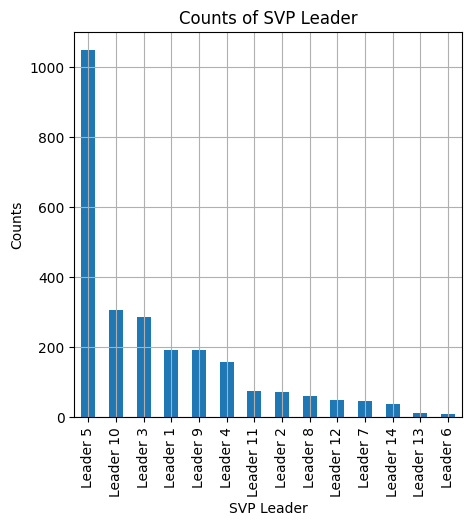

In [ ]:
# Plot the value counts as a bar plot
plt.figure(figsize=(5,5))
value_counts=data['SVP Leader'].value_counts()
value_counts.plot(kind='bar')
plt.title('Counts of SVP Leader')
plt.xlabel('SVP Leader')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [ ]:
#Replace nan values
data2.replace(np.nan, 'NA', inplace=True)

In [ ]:
data2['Training_Completed'].value_counts()

NA                                1273
Sell More Suite SKU                794
Advanced Suite Bots Lab Course     277
Suite/Automation Technical Lab      90
Name: Training_Completed, dtype: int64

In [ ]:
for i in range(1,15):

  print('Leader '+str(i))
  df = data2[data2['SVP Leader'] == 'Leader '+str(i)]
  a = df['Training_Completed'].value_counts()
  print(a)
  print('\n')

Leader 1
NA                                100
Sell More Suite SKU                77
Suite/Automation Technical Lab      3
Advanced Suite Bots Lab Course      3
Name: Training_Completed, dtype: int64


Leader 2
NA                                46
Sell More Suite SKU               17
Suite/Automation Technical Lab     3
Name: Training_Completed, dtype: int64


Leader 3
NA                                165
Sell More Suite SKU               114
Suite/Automation Technical Lab      1
Name: Training_Completed, dtype: int64


Leader 4
Sell More Suite SKU               105
NA                                 44
Suite/Automation Technical Lab      1
Name: Training_Completed, dtype: int64


Leader 5
NA                                595
Advanced Suite Bots Lab Course    194
Sell More Suite SKU               138
Suite/Automation Technical Lab     75
Name: Training_Completed, dtype: int64


Leader 6
NA                     4
Sell More Suite SKU    4
Name: Training_Completed, dtype: int64


Leader 

In [ ]:
data2['Training_Completed'].value_counts()

NA                                1273
Sell More Suite SKU                794
Advanced Suite Bots Lab Course     277
Suite/Automation Technical Lab      90
Name: Training_Completed, dtype: int64

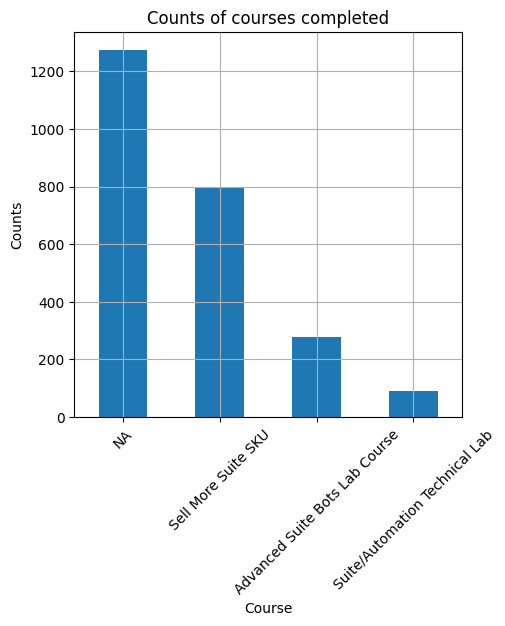

In [ ]:
# Plot the value counts as a bar plot
plt.figure(figsize=(5,5))
value_counts=data2['Training_Completed'].value_counts()
ax = value_counts.plot(kind='bar')
plt.title('Counts of courses completed')
plt.xlabel('Course')
plt.ylabel('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.grid()
plt.show()

In [ ]:
data2['Region'].value_counts()

North America    1020
EMEA              674
APAC              519
LATAM             221
Name: Region, dtype: int64

In [ ]:
regions = list(data2['Region'].unique())

In [ ]:
for i in regions:

  print(i+'\n')
  df = data2[data2['Region'] == i]
  a = df['Training_Completed'].value_counts()
  print(a)
  print('\n')

EMEA

NA                                316
Sell More Suite SKU               246
Advanced Suite Bots Lab Course     78
Suite/Automation Technical Lab     34
Name: Training_Completed, dtype: int64


LATAM

NA                                124
Sell More Suite SKU                65
Advanced Suite Bots Lab Course     29
Suite/Automation Technical Lab      3
Name: Training_Completed, dtype: int64


North America

Sell More Suite SKU               459
NA                                435
Advanced Suite Bots Lab Course     97
Suite/Automation Technical Lab     29
Name: Training_Completed, dtype: int64


APAC

NA                                398
Advanced Suite Bots Lab Course     73
Sell More Suite SKU                24
Suite/Automation Technical Lab     24
Name: Training_Completed, dtype: int64




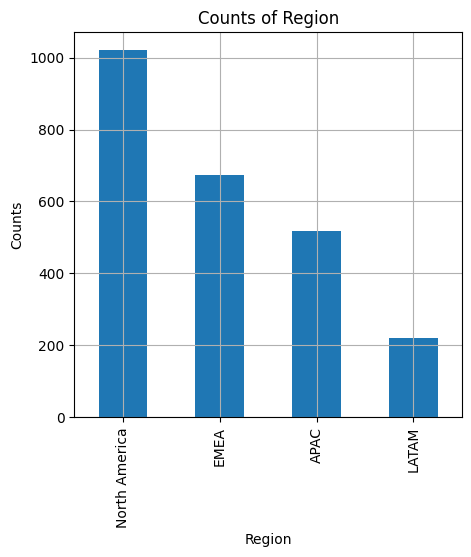

In [ ]:
# Plot the value counts as a bar plot
plt.figure(figsize=(5,5))
value_counts=data2['Region'].value_counts()
value_counts.plot(kind='bar')
plt.title('Counts of Region')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.grid()
plt.show()

In [ ]:
#Analyzing the biggest group people from North America and Leader 5
data3 = data2[data2['SVP Leader'] == 'Leader 5']
data3 = data3[data3['Region'] == 'North America']
data3

,SVP Leader,Business Title,Cost Center,Cost Center Family,Length of service,Leave Status,is People Manager?,Region,Manager IC Helper,Training_Completed,...,Type,Stage 2+ Date,Stage,Close Date,Product Rate Plan Charge,Product Name,Add-On ARR (converted) Currency,Add-On ARR (converted),Total Commissionable ARR (converted) Currency,Total Commissionable ARR (converted)
Employee_ID,,,,,,,,,,,,,,,,,,,,,
56.0,Leader 5,Senior Advocacy Systems Manager,285 Advocacy Operations,Advocacy,120.0,Active,False,North America,IC,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
57.0,Leader 5,Senior Chatbot Conversation Designer,285 Advocacy Operations,Advocacy,94.0,Active,False,North America,IC,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
58.0,Leader 5,Principal Developer Advocate,280 Advocacy Core,Advocacy,87.0,Active,False,North America,IC,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
60.0,Leader 5,"Manager, Chatbot & CX Automation",285 Advocacy Operations,Advocacy,65.0,Active,True,North America,People Manager,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
61.0,Leader 5,"Senior Manager, Advocacy Systems Management",285 Advocacy Operations,Advocacy,62.0,Active,True,North America,People Manager,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509.0,Leader 5,Specialist,566 Tymeshift S&M,Sales Management,0.0,Active,False,North America,IC,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2511.0,Leader 5,Specialist,266 Tymeshift COGS,Advocacy,0.0,Active,False,North America,IC,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2515.0,Leader 5,Specialist,566 Tymeshift S&M,Sales Management,0.0,Active,False,North America,IC,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
data3['Training_Completed'].value_counts()

NA                                215
Sell More Suite SKU                84
Advanced Suite Bots Lab Course     65
Suite/Automation Technical Lab     22
Name: Training_Completed, dtype: int64

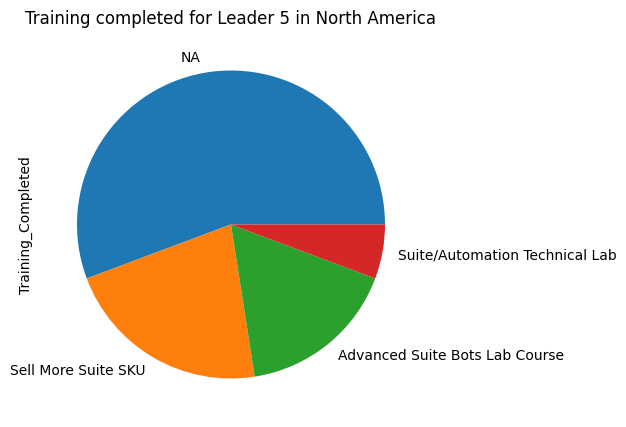

In [ ]:
# Plot the value counts as a bar plot
plt.figure(figsize=(5,5))
value_counts=data3['Training_Completed'].value_counts()
value_counts.plot(kind='pie')
plt.title('Training completed for Leader 5 in North America')
plt.grid()
plt.show()

## Findings

In the initial finding we can see that most of the people has a SVP Leader type Leader 5 and most of the people live in North America. For a population of 2434 most of the people have not completed a course. The course that they like the most is "Sell More Suite".

# Solution Question 2

2. How would you analyze the performance of an account executive? Is there a difference
between those who have completed training and those who have not? How would you
segment the data and present your findings to senior stakeholders?




In [ ]:
data['is People Manager?'].value_counts()

False    2124
True      409
Name: is People Manager?, dtype: int64

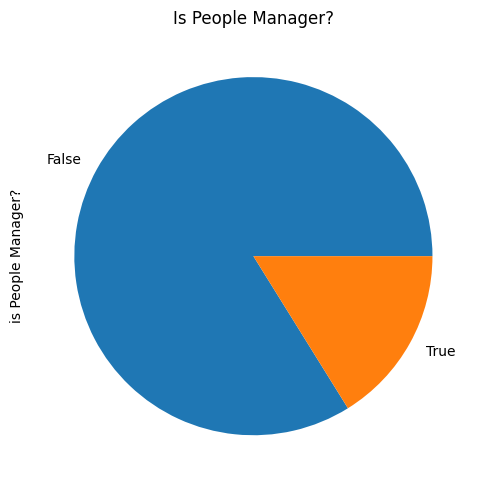

In [ ]:
plt.figure(figsize=(5,5))
value_counts=data['is People Manager?'].value_counts()
value_counts.plot(kind='pie')
plt.title('Is People Manager?')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#Replace nan values
data.replace(np.nan, 'NA', inplace=True)

In [ ]:
#Split data if people is manager or not

manager = data[data['is People Manager?'] == True]
no_manager = data[data['is People Manager?'] == False]

In [ ]:
#Manager

value_counts = manager['Training_Completed'].value_counts()
percentage = (value_counts / len(manager)) * 100

print("Training Completed for Managers\n")
print('--------------- Percentage ----------------')
print(percentage)
print('\n')
print("Training Completed for Managers\n")
print('-------------- Value Counts ---------------')
print(value_counts)

Training Completed for Managers

--------------- Percentage ----------------
NA                                54.278729
Sell More Suite SKU               33.985330
Advanced Suite Bots Lab Course    10.024450
Suite/Automation Technical Lab     1.711491
Name: Training_Completed, dtype: float64


Training Completed for Managers

-------------- Value Counts ---------------
NA                                222
Sell More Suite SKU               139
Advanced Suite Bots Lab Course     41
Suite/Automation Technical Lab      7
Name: Training_Completed, dtype: int64


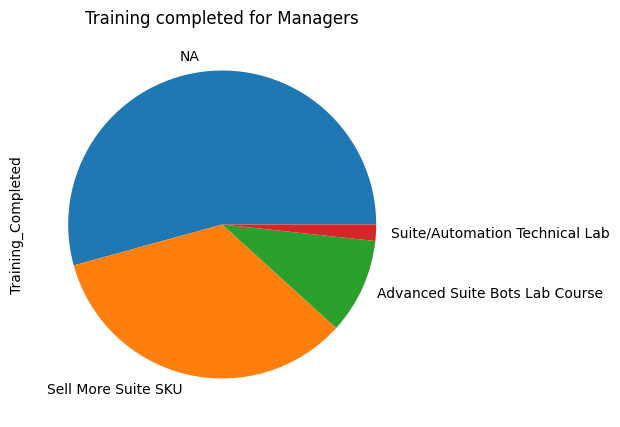

In [ ]:
plt.figure(figsize=(5,5))
value_counts=manager['Training_Completed'].value_counts()
ax = value_counts.plot(kind='pie')
plt.title('Training completed for Managers')
plt.grid()
plt.show()

In [ ]:
#No Manager

value_counts = no_manager['Training_Completed'].value_counts()
percentage = (value_counts / len(no_manager)) * 100

print("Training Completed for No Managers\n")
print('--------------- Percentage ----------------')
print(percentage)
print('\n')
print("Training Completed for No Managers\n")
print('-------------- Value Counts ---------------')
print(value_counts)

Training Completed for No Managers

--------------- Percentage ----------------
NA                                52.919021
Sell More Suite SKU               31.120527
Advanced Suite Bots Lab Course    11.817326
Suite/Automation Technical Lab     4.143126
Name: Training_Completed, dtype: float64


Training Completed for No Managers

-------------- Value Counts ---------------
NA                                1124
Sell More Suite SKU                661
Advanced Suite Bots Lab Course     251
Suite/Automation Technical Lab      88
Name: Training_Completed, dtype: int64


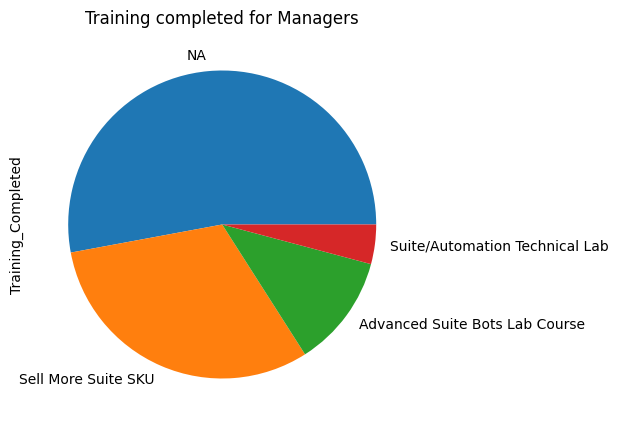

In [ ]:
plt.figure(figsize=(5,5))
value_counts=no_manager['Training_Completed'].value_counts()
ax = value_counts.plot(kind='pie')
plt.title('Training completed for Managers')
plt.grid()
plt.show()

## Findings

We can see that not to many people is Manager in a population of 2533 only the 16% of the people is Manager, and there not exist a big difference in percentage for people who is manager or not being manager does not mean that they have completed courses.

* 54.3% of Managers have not completed a course.
* 52.9% of No Managers have not completed a course.



# Solution Question 3

3. Any other interesting insights that you can see in the data? Any data quality issues with
the data? Any challenges with analyzing the data? What additional data do you think
would be useful for further analyzing the existing datasets?


I will analyze if the length of service is important if people have coompleted a course.

In [ ]:
#Analyze if the Length of service

np.sort(data['Length of service'].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 120., 121., 122., 124.,
       125., 126., 128., 131., 132., 136., 138., 140., 143., 149., 165.])

It is not possible to know what does this value really means if is months or weeks. In this case we will consider that is months.


It will be analyzed whether people with more than 100 months have completed more courses or not.

In [ ]:
#Count of missing values in Length of service
data['Length of service'].isna().sum()

0

In [ ]:
data['Months'] = data['Length of service'].apply(lambda x: True if x >= 60 else False)

In [ ]:
m60 = data[data['Months'] == True]
m0 = data[data['Months'] == False]

In [ ]:
print('Total of people with 100 months or older')
print(len(m60))

Total of people with 100 months or older
327


In [ ]:
print('Total of people less than 60 months old')
print(len(m0))

Total of people less than 60 months old
2206


In [ ]:
#Length of service >= 60 months

value_counts = m60['Training_Completed'].value_counts()
percentage = (value_counts / len(m60)) * 100

print("Training Completed for people with >= 60 Months\n")
print('--------------- Percentage ----------------')
print(percentage)
print('\n')
print("Training Completed for people with >= 60 Months\n")
print('-------------- Value Counts ---------------')
print(value_counts)

Training Completed for people with >= 60 Months

--------------- Percentage ----------------
NA                                55.351682
Sell More Suite SKU               24.770642
Advanced Suite Bots Lab Course    12.844037
Suite/Automation Technical Lab     7.033639
Name: Training_Completed, dtype: float64


Training Completed for people with >= 60 Months

-------------- Value Counts ---------------
NA                                181
Sell More Suite SKU                81
Advanced Suite Bots Lab Course     42
Suite/Automation Technical Lab     23
Name: Training_Completed, dtype: int64


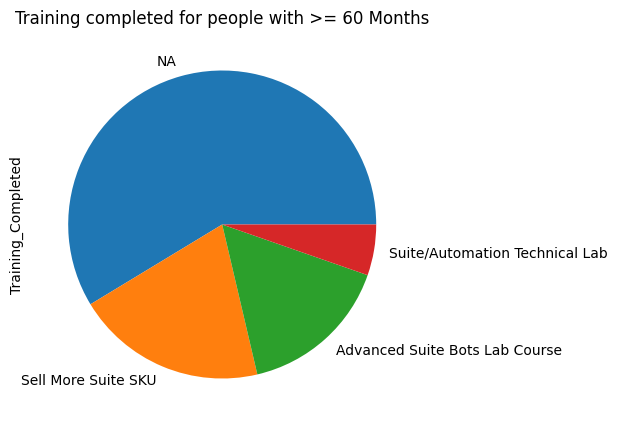

In [ ]:
plt.figure(figsize=(5,5))
value_counts=m100['Training_Completed'].value_counts()
ax = value_counts.plot(kind='pie')
plt.title('Training completed for people with >= 60 Months')
plt.grid()
plt.show()

In [ ]:
#Length of service < 100 months

value_counts = m0['Training_Completed'].value_counts()
percentage = (value_counts / len(m0)) * 100

print("Training Completed for people with < 100 Months\n")
print('--------------- Percentage ----------------')
print(percentage)
print('\n')
print("Training Completed for people with < 100 Months\n")
print('-------------- Value Counts ---------------')
print(value_counts)

Training Completed for people with < 100 Months

--------------- Percentage ----------------
NA                                52.810517
Sell More Suite SKU               32.592928
Advanced Suite Bots Lab Course    11.332729
Suite/Automation Technical Lab     3.263826
Name: Training_Completed, dtype: float64


Training Completed for people with < 100 Months

-------------- Value Counts ---------------
NA                                1165
Sell More Suite SKU                719
Advanced Suite Bots Lab Course     250
Suite/Automation Technical Lab      72
Name: Training_Completed, dtype: int64


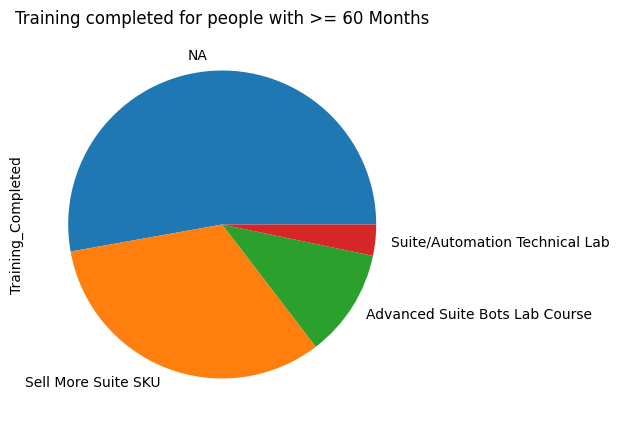

In [ ]:
plt.figure(figsize=(5,5))
value_counts=m0['Training_Completed'].value_counts()
ax = value_counts.plot(kind='pie')
plt.title('Training completed for people with >= 60 Months')
plt.grid()
plt.show()

With this results we can know that being more time in the company does not mean that you have completed more courses.

There exists a big quality issue with data, there exists to many missing values and this is not always the best in order to get the best results, but also it is important to mention that many of the columns are not necessary.

The biggest challege while analysing the data is how to consider the missing values if only remove the values or consider the missing values.

An important column that can be usuful to add is the payment in order to analyze if people with a greater payment have completed more courses or not.


